## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouseduplicates = study_results_path.loc[study_results_path.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique
# mouseduplicates = study_results_path.drop_duplicates(subset = "Mouse ID", keep = "first")
# duplicates1 = duplicates.groupby(["Mouse ID"])
# mouseduplicates = study_results_path.loc[study_results_path.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# combine.drop_duplicates(subset ="Mouse ID", 
#                      keep = False, inplace = True)

In [7]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sdeviation = combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summarystatistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": sdeviation, 
                          "SEM": sem})
summarystatistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<BarContainer object of 1 artists>

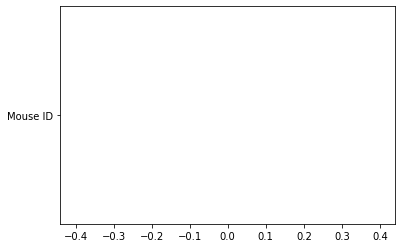

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice = ["Mouse ID"]
drugs = ["Drug Regimen"]
x_axis = np.arange(len(drugs))
plt.bar(x_axis, mice, color = "r", alpha = 0.5, align = "center")

# mice = pd.DataFrame(combine.groupby(["Drug Regimen"]).count())
# mice1 = mice[["Drug Regimen", "Mouse ID"]]
# mice1 = mice.rename(columns={"Mouse ID": "Count"})
# mice1 = mice1.set_index("Drug Regimen")
# mice1


In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



ValueError: could not convert string to float: 'Male'

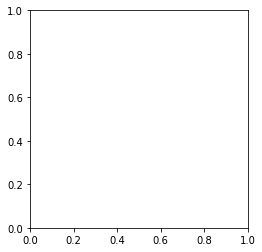

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ("Male", "Female")
values = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(labels, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("../Images/PyPies.png")
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvolume = []

for treatment in treatments:
    tumor = maxcombined.loc[maxcombined["Drug Regimen"] = treatment, ["Tumor Volume (mm3)"]]
    tumorvolume.append(tumor)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = maxcombined[tumor].quantile([.25, .5, .75]).round(2)
lowerq = quartiles[0.25].round(2)
upper = quartiles[0.75].round(2)
iqr = round(upperq-lowerq, 2)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lowerbound = round(lowerq - (1.5*iqr),2)
    upperbound = round(lowerq - (1.5*iqr),2)
    outliertreatment = [x for x in tumor  if (x > upperbound) | (x < lowerbound)]
    print(f"The outliers for (treatment) are (outliertreatment)")

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


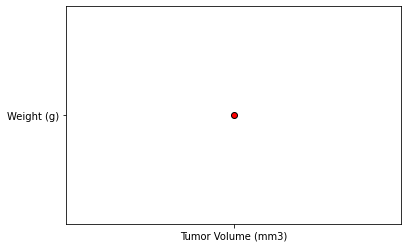

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumorvolume = ["Tumor Volume (mm3)"]
mouseweight = ["Weight (g)"]
x_limit = 28
x_axis = np.arange(0, x_limit, 1)
# data = [random.random]
plt.scatter(tumorvolume, mouseweight, marker="o", facecolors="red", edgecolors="black")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
